In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
df_train = pd.read_csv('combined_train_with_labels.csv.gz')

df_test = pd.read_csv('combined_test_with_labels.csv.gz')

In [3]:
df_train.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SC,current_skewness,spectral_centroid_power,tail_charge_diff,...,late_over_early,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,1.040000e+06,1.040000e+06,1.040000e+06,1.039995e+06,1.040000e+06,1.039995e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,...,1.040000e+06,1.039995e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06
mean,6.381633e+02,9.516434e+02,3.406036e+03,2.423961e+03,1.583331e+124,7.254552e-01,3.572992e-02,1.906792e+00,1.145299e+02,-5.468692e-01,...,9.893650e-01,1.131437e+02,1.495163e-01,5.104236e+00,1.777303e+00,6.049704e-02,4.964875e-01,4.091337e+11,6.792718e+01,3.643588e-02
std,6.704271e+02,1.895332e+01,7.735526e+00,3.925200e+02,1.614687e+127,2.832694e-02,6.330801e-03,5.312883e-01,1.069477e+02,1.561871e+00,...,1.121635e-01,7.287391e+01,3.987192e-02,7.352031e+00,1.174284e+00,2.152323e-02,9.173632e-02,1.401446e+12,2.442059e+01,8.420477e-03
min,0.000000e+00,7.100000e+01,3.074000e+03,2.000000e+00,-5.949322e+06,-7.703542e+00,2.676319e-02,-1.809541e+00,8.986718e+01,-8.692308e+00,...,1.302615e-01,9.000000e+00,1.968922e-02,1.000000e+00,6.992497e-01,3.636530e-02,3.150645e-02,1.000000e+00,5.000000e+00,2.650746e-02
25%,2.383612e+02,9.420000e+02,3.404000e+03,2.191000e+03,-7.774117e+05,7.088948e-01,3.452545e-02,1.584701e+00,1.067439e+02,-6.236000e-01,...,9.873562e-01,8.600000e+01,1.408390e-01,1.000000e+00,1.116426e+00,5.533778e-02,4.353313e-01,1.000000e+00,5.100000e+01,3.454584e-02
50%,3.411866e+02,9.540000e+02,3.407000e+03,2.325000e+03,-4.279560e+05,7.211736e-01,3.480813e-02,1.939160e+00,1.086075e+02,-5.968707e-01,...,9.879051e-01,1.020000e+02,1.457415e-01,2.000000e+00,1.321930e+00,6.133205e-02,5.268103e-01,1.000000e+00,6.500000e+01,3.505329e-02
75%,6.300128e+02,9.640000e+02,3.410000e+03,2.510000e+03,-3.063921e+05,7.361495e-01,3.524030e-02,2.253204e+00,1.103433e+02,-5.640222e-01,...,9.885530e-01,1.210000e+02,1.509235e-01,5.000000e+00,1.908089e+00,6.423424e-02,5.653386e-01,6.588437e+01,8.200000e+01,3.580735e-02
max,4.998508e+03,1.352000e+03,3.790000e+03,3.799000e+03,1.646664e+130,9.768917e-01,2.028693e-01,5.229496e+00,1.637442e+04,3.112500e+02,...,4.640625e+01,2.919000e+03,3.990051e+00,5.500000e+01,3.667323e+01,2.569411e+00,9.706884e-01,7.968905e+12,3.910000e+02,2.743541e-01


In [4]:
df_test.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SCA,ND80,total_power,tail_slope,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,...,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000
mean,636.420597,951.667418,3406.022251,2053.719892,-6.961829e+05,0.689568,0.035721,0.002938,8.918050,10.172294,...,69.810474,112.998205,0.149470,5.092323,1.778528,0.060501,0.496437,4.061964e+11,67.902682,0.036423
std,669.051804,18.715776,7.745847,130.787881,7.275291e+05,0.020824,0.006291,0.040122,0.800205,372.773015,...,30.157888,72.299817,0.038967,7.320057,1.179948,0.021937,0.091690,1.396748e+12,24.343887,0.008374
min,0.000000,105.000000,3194.000000,18.000000,-5.045836e+06,0.119332,0.029060,0.000000,3.989967,-23687.071094,...,0.000000,31.000000,0.026388,1.000000,0.689202,0.036675,0.031747,1.000000e+00,5.000000,0.028515
25%,238.364583,942.000000,3404.000000,2032.000000,-6.942430e+05,0.688435,0.034525,0.000000,8.436952,-1.089048,...,54.000000,86.000000,0.140847,1.000000,1.116218,0.055314,0.434686,1.000000e+00,51.000000,0.034545
50%,341.175226,954.000000,3407.000000,2066.000000,-3.769012e+05,0.693434,0.034808,0.000000,8.751684,1.719824,...,69.000000,103.000000,0.145750,2.000000,1.321458,0.061334,0.526955,1.000000e+00,65.000000,0.035055
75%,624.133505,964.000000,3410.000000,2099.000000,-2.655630e+05,0.697469,0.035238,0.000000,9.273502,7.078511,...,83.000000,121.000000,0.150928,5.000000,1.904600,0.064239,0.565397,6.574662e+01,82.000000,0.035810
max,4177.604856,1351.000000,3796.000000,3794.000000,6.259656e+04,0.986577,0.192336,1.961100,10.722037,52359.208420,...,2841.000000,2878.000000,2.903741,53.000000,14.526829,2.387268,0.895246,8.081810e+12,363.000000,0.264706


In [5]:
print("train shape:", df_train.shape)
print("test shape:", df_test.shape)

print("train unique ids:", df_train["id"].nunique())
print("test unique ids:", df_test["id"].nunique())

print("any duplicate ids in train:", df_train["id"].duplicated().any())
print("any duplicate ids in test:", df_test["id"].duplicated().any())

print("null counts train (top 10):\n", df_train.isna().sum().sort_values(ascending=False).head(10))


train shape: (1040000, 29)
test shape: (390000, 33)
train unique ids: 1040000
test unique ids: 390000
any duplicate ids in train: False
any duplicate ids in test: False
null counts train (top 10):
 HWP                    5
PPR                    5
tdrift99               5
energy_label           0
psd_label_low_avse     0
psd_label_dcr          0
psd_label_high_avse    0
tp0                    0
psd_label_lq           0
ED                     0
dtype: int64


In [6]:
type(df_train['psd_label_dcr'][1])

numpy.bool

In [7]:
print(df_train.columns)


Index(['id', 'energy_label', 'psd_label_low_avse', 'psd_label_high_avse',
       'psd_label_dcr', 'psd_label_lq', 'tp0', 'ED', 'HWP', 'LQ80', 'PPR',
       'SC', 'current_skewness', 'spectral_centroid_power', 'tail_charge_diff',
       'current_kurtosis', 'total_power', 'time_to_main_peak', 'time_to_peak',
       'late_over_early', 'tdrift99', 'tfr', 'peak_count', 'gbn', 'bpr',
       'AvsE', 'GradAreaRatio', 'GradWidthMain', 'HFER'],
      dtype='object')


In [8]:
print(df_test.columns)

Index(['id', 'energy_label', 'psd_label_low_avse', 'psd_label_high_avse',
       'psd_label_dcr', 'psd_label_lq', 'tp0', 'ED', 'HWP', 'LQ80', 'PPR',
       'SCA', 'ND80', 'total_power', 'tail_slope', 'time_to_main_peak',
       'current_skewness', 'tail_slope_no_pz', 'current_kurtosis',
       'time_to_peak', 'spectral_centroid_power', 'current_width', 'tdrift10',
       'tdrift50', 'tdrift99', 'tfr', 'peak_count', 'gbn', 'bpr', 'AvsE',
       'GradAreaRatio', 'GradWidthMain', 'HFER'],
      dtype='object')


Target Labels

In [9]:
label_cols = [
    "psd_label_lq",
    "psd_label_high_avse",
    "psd_label_low_avse",
    "psd_label_dcr",
]

# MODEL TRAINING

### Preprocessing 

In [10]:
y_col = "psd_label_lq"

drop_cols = [
    "id",
    "energy_label",
    "psd_label_low_avse",
    "psd_label_high_avse",
    "psd_label_dcr",
    "psd_label_lq"
]


X = df_train.drop(columns = drop_cols)
y = df_train[y_col]


In [11]:
X.isna().sum().sort_values(ascending=False)

HWP                        5
PPR                        5
tdrift99                   5
ED                         0
LQ80                       0
SC                         0
tp0                        0
current_skewness           0
spectral_centroid_power    0
current_kurtosis           0
tail_charge_diff           0
total_power                0
time_to_main_peak          0
time_to_peak               0
late_over_early            0
tfr                        0
peak_count                 0
gbn                        0
bpr                        0
AvsE                       0
GradAreaRatio              0
GradWidthMain              0
HFER                       0
dtype: int64

In [13]:
rows_with_nan = df_train[df_train.isna().any(axis=1)]
# rows_with_nan[["id", "tdrift10", "tdrift50", "tdrift99"]]


In [15]:
# bad_ids = df_train.loc[df_train["tdrift10"].isna(), "id"].tolist()
# bad_ids


## Eunice Model Training - psd_label_lq

### Logistic Regression

In [16]:
# train / val / test split 

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.25,   # 0.25 * 0.8 = 0.2 overall
    random_state=42,
    stratify=y_train_full
)

In [17]:
# Logistic Regression Pipeline
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        max_iter=2000, # to avoide convergence issues
        class_weight="balanced",
        solver="lbfgs" # supports class weights
    ))
])



In [18]:
# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("Logistic Regression F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression F1: 0.7815163814564623
              precision    recall  f1-score   support

       False       0.50      0.61      0.55     60774
        True       0.82      0.74      0.78    147226

    accuracy                           0.71    208000
   macro avg       0.66      0.68      0.66    208000
weighted avg       0.73      0.71      0.71    208000



- Based on the classification report, there is a clear class imbalance where there are significantly more True than False samples. The logistic regression model performs better on the True class achieving precision of 0.85 and recall of 0.79, indicating that most predicted single site events are correct and the model successfully captures the majority of true single site events. Performance on the class is weaker with a precision of 0.56 and recall of 0.65. This suggests that multi site events are more difficult to distinguish and are more frequently misclassified. Overall, the model achieves an F1 score of 0.82 on the True class, which shows a strong baseline performance despite the class imbalance.

- Precision: 
    - When model predicts True, it is correct 85% of the time
    - When model predicts False, it is correct 56% of the time
- Recall: 
    - The model correctly identifies 79% of True events
    - The model correctly identifies 65% of False events




- The baseline Logistic Regression model achieved an F1 score of 0.82 for predicting the psd_label_lq column. 

In [19]:
feature_names = X.columns
coef = pipe.named_steps["lr"].coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef
}).sort_values(by="coefficient", ascending=False)

coef_df["abs_coefficient"] = coef_df["coefficient"].abs()

coef_df_sorted = coef_df.sort_values(by = "abs_coefficient", ascending = False)

coef_df_sorted


,feature,coefficient,abs_coefficient
6,current_skewness,1.380951,1.380951
3,LQ80,-1.242734,1.242734
10,total_power,-1.056295,1.056295
9,current_kurtosis,-0.987307,0.987307
11,time_to_main_peak,-0.760518,0.760518
0,tp0,-0.698449,0.698449
18,bpr,0.421826,0.421826
8,tail_charge_diff,-0.399221,0.399221
12,time_to_peak,-0.366601,0.366601
4,PPR,-0.298538,0.298538


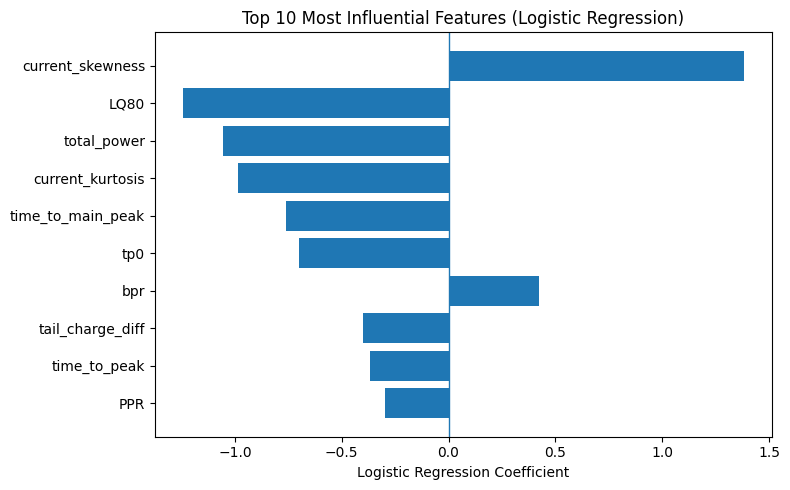

In [20]:
top_n = 10
top_coef = coef_df_sorted.head(top_n)

plt.figure(figsize=(8, 5))
plt.barh(
    top_coef["feature"],
    top_coef["coefficient"]
)
plt.axvline(0, linewidth=1)
plt.xlabel("Logistic Regression Coefficient")
plt.title("Top 10 Most Influential Features (Logistic Regression)")
plt.gca().invert_yaxis()  # strongest at top
plt.tight_layout()
plt.show()

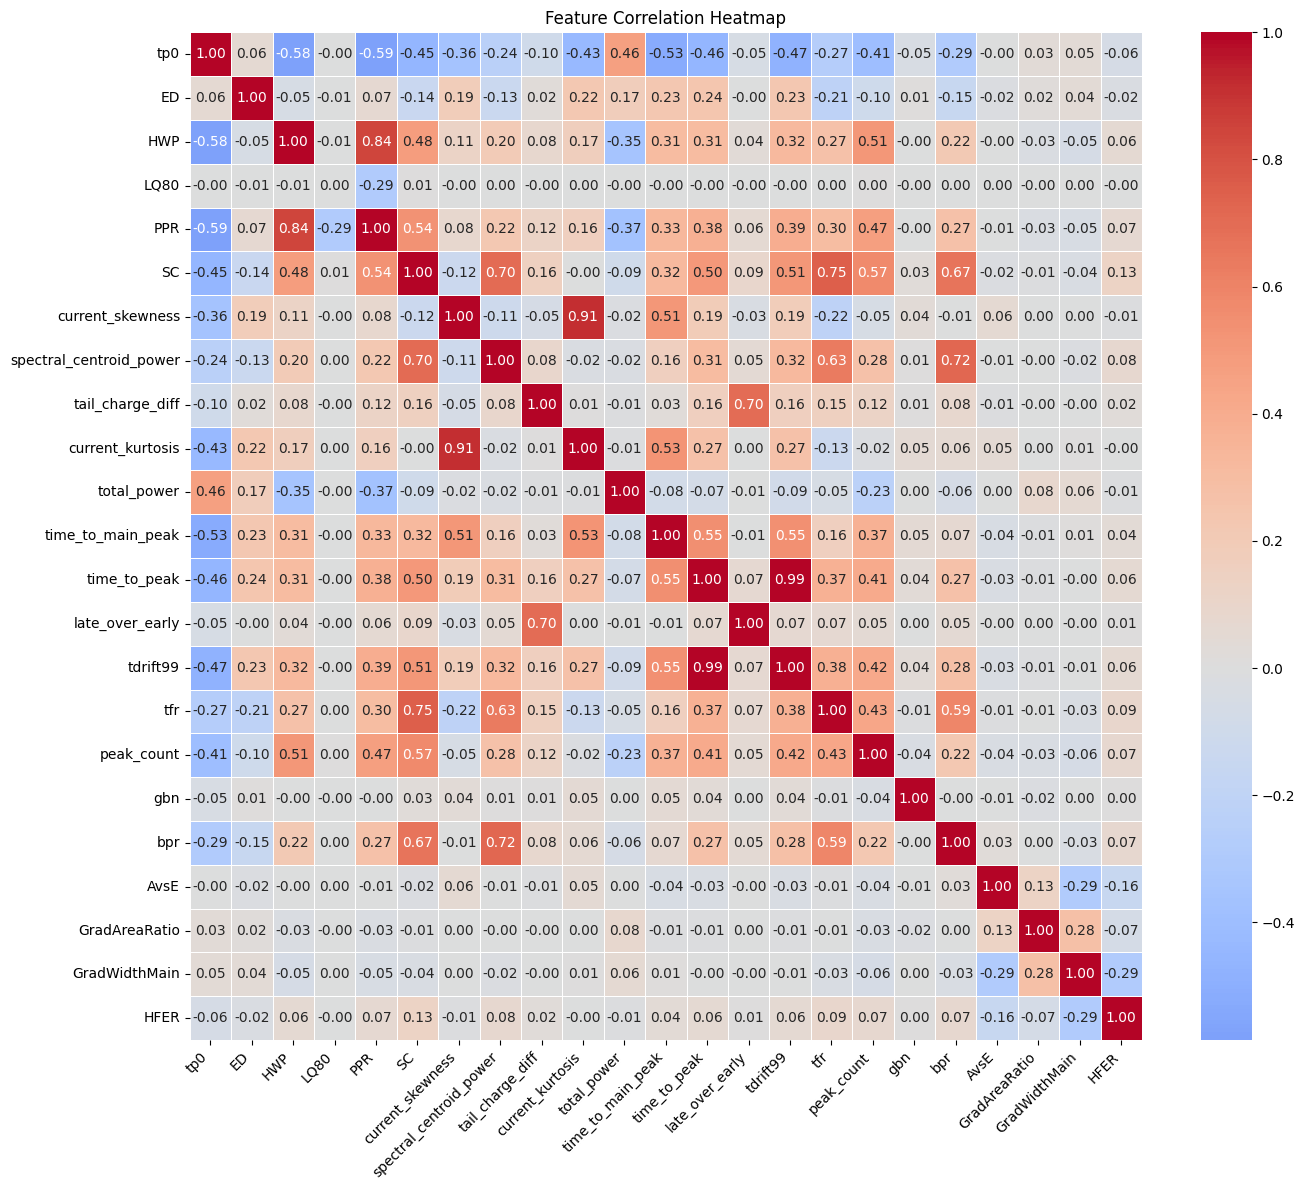

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    X.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Random Forest

In [22]:
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

In [23]:
# Train
rf_pipe.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_pipe.predict(X_test)

print("Random Forest F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\YooNi\miniforge3\lib\site-packages\sklearn\utils\_array_api.py:745: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

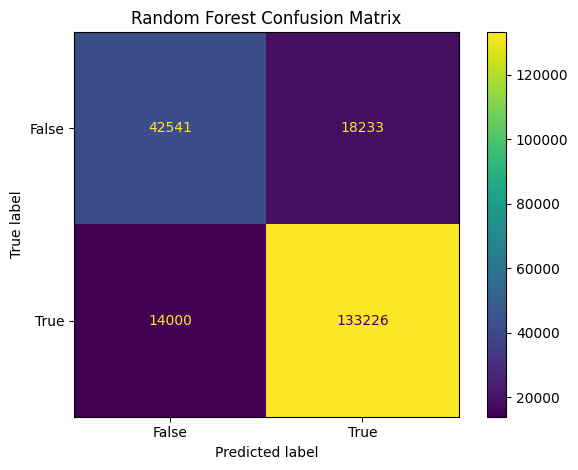

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

,feature,importance
22,bpr,0.104802
9,spectral_centroid_power,0.088285
2,HWP,0.080855
7,current_skewness,0.066295
4,PPR,0.065772
10,current_kurtosis,0.062238
17,tdrift50,0.056240
15,current_width,0.048197
11,tail_slope,0.046941
8,tail_slope_no_pz,0.043213


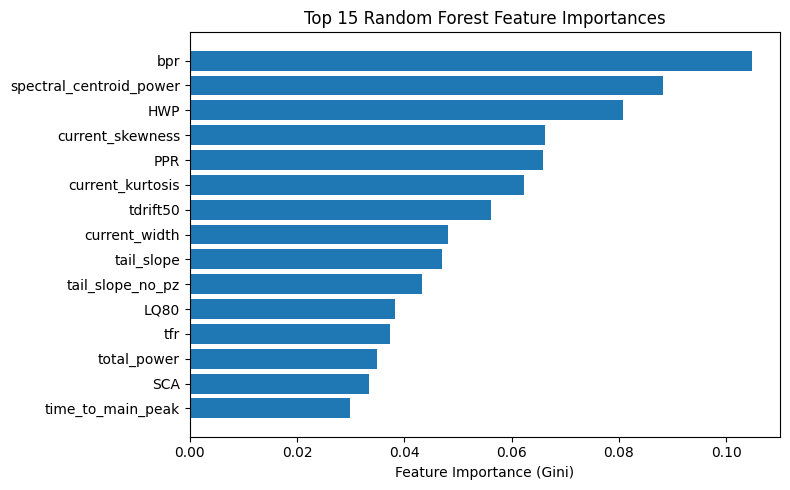

In [ ]:
rf_model = rf_pipe.named_steps["rf"]
importances = rf_model.feature_importances_

imp_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

display(imp_df.head(20))

top_n = 15
top_imp = imp_df.head(top_n).sort_values("importance", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(top_imp["feature"], top_imp["importance"])
plt.xlabel("Feature Importance (Gini)")
plt.title(f"Top {top_n} Random Forest Feature Importances")
plt.tight_layout()
plt.show()

## threshold tuning and sweeping Random Forest model

- goal is to reduce false negatives
- 0.5 is default decision threshold so trying to find the threshold that maximizes the F1 score. 
- perform threshold tuning on validation set by sweeping decision thresholds from 0.1 to 0.9


In [ ]:
# rf_pipe.fit(X_train, y_train)


In [ ]:
y_val_scores = rf_pipe.predict_proba(X_val)[:, 1]


In [ ]:
thresholds = np.linspace(0.1, 0.9, 81)  # fine-grained sweep
f1_scores = []

for t in thresholds:
    y_val_pred = (y_val_scores >= t).astype(int)
    f1 = f1_score(y_val, y_val_pred)
    f1_scores.append(f1)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print("Best threshold:", best_threshold)
print("Validation F1 at best threshold:", best_f1)


Best threshold: 0.4
Validation F1 at best threshold: 0.8984476871526903


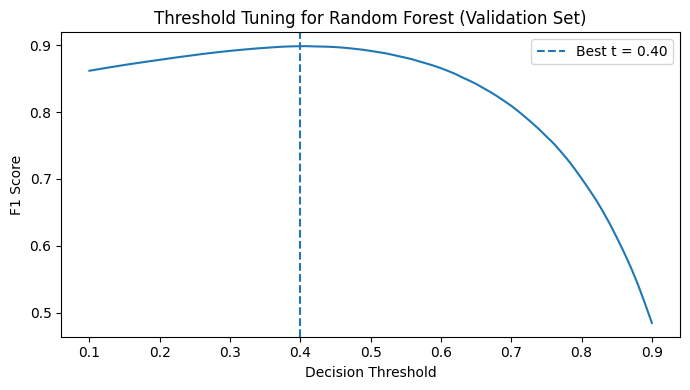

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(thresholds, f1_scores)
plt.axvline(best_threshold, linestyle="--", label=f"Best t = {best_threshold:.2f}")
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold Tuning for Random Forest (Validation Set)")
plt.legend()
plt.tight_layout()
plt.show()


Random Forest F1 (tuned): 0.898552111543872
              precision    recall  f1-score   support

       False       0.85      0.58      0.69     60774
        True       0.85      0.96      0.90    147226

    accuracy                           0.85    208000
   macro avg       0.85      0.77      0.79    208000
weighted avg       0.85      0.85      0.84    208000



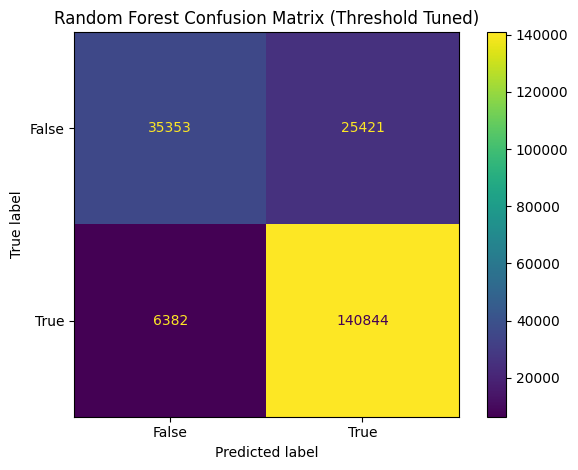

In [ ]:
y_test_scores = rf_pipe.predict_proba(X_test)[:, 1]
y_test_pred_tuned = (y_test_scores >= best_threshold).astype(int)

print("Random Forest F1 (tuned):", f1_score(y_test, y_test_pred_tuned))
print(classification_report(y_test, y_test_pred_tuned))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_tuned
)
plt.title("Random Forest Confusion Matrix (Threshold Tuned)")
plt.tight_layout()
plt.show()


- fine-grained sweeping: small steps of trying thresholds

After applying threshold tuning, the Random Forest model achieved an F1 score of approximately 0.90 for predicting psd_label_lq. When I lowered the decision threshold to 0.42, the model improved recall for true single-site events to 0.95 while maintiaining high precision. This tradeoff reduces false negatives, which is particularly important for identifying single-site events in the Majorana Demonstrator dataset. 

## XGBoost

In [ ]:
y_train.value_counts()

psd_label_lq
True     441678
False    182322
Name: count, dtype: int64

In [ ]:
xgb_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("xgb", XGBClassifier(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=2,
        reg_lambda=1.0,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        n_jobs=-1,
        random_state=42
    ))
])


XGBoost F1 (default 0.5): 0.8951093704002355
              precision    recall  f1-score   support

       False       0.83      0.58      0.68     60774
        True       0.85      0.95      0.90    147226

    accuracy                           0.84    208000
   macro avg       0.84      0.77      0.79    208000
weighted avg       0.84      0.84      0.83    208000



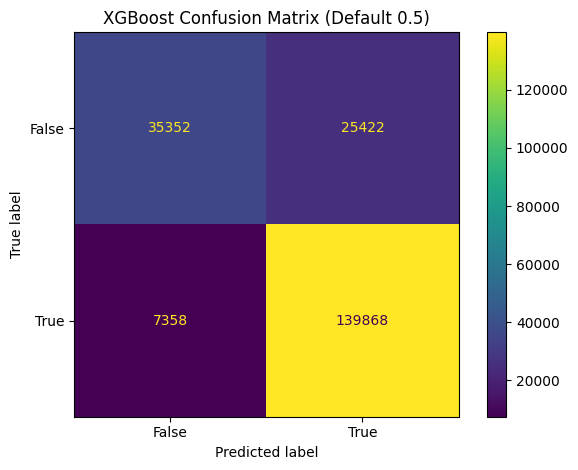

In [ ]:
xgb_pipe.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)
print("XGBoost F1 (default 0.5):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_test, y_test)
plt.title("XGBoost Confusion Matrix (Default 0.5)")
plt.tight_layout()
plt.show()


Best threshold: 0.47
Validation F1 at best threshold: 0.8950527395438947


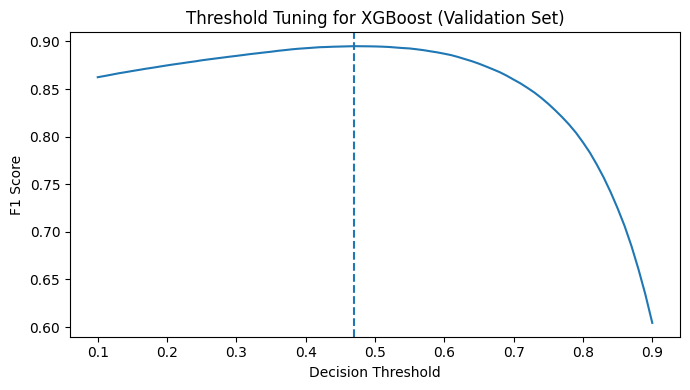

In [ ]:
# Validation scores
y_val_scores = xgb_pipe.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for t in thresholds:
    y_val_pred = (y_val_scores >= t).astype(int)
    f1_scores.append(f1_score(y_val, y_val_pred))

best_idx = int(np.argmax(f1_scores))
best_threshold = float(thresholds[best_idx])
best_f1 = float(f1_scores[best_idx])

print("Best threshold:", best_threshold)
print("Validation F1 at best threshold:", best_f1)

plt.figure(figsize=(7, 4))
plt.plot(thresholds, f1_scores)
plt.axvline(best_threshold, linestyle="--")
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold Tuning for XGBoost (Validation Set)")
plt.tight_layout()
plt.show()


XGBoost F1 (tuned): 0.8952023280631034
              precision    recall  f1-score   support

       False       0.85      0.55      0.67     60774
        True       0.84      0.96      0.90    147226

    accuracy                           0.84    208000
   macro avg       0.84      0.76      0.78    208000
weighted avg       0.84      0.84      0.83    208000



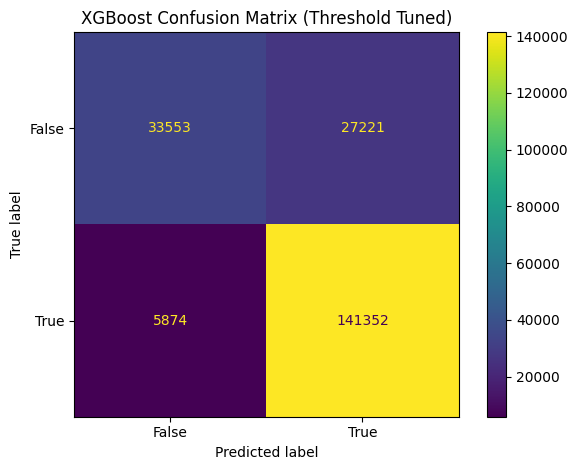

In [ ]:
y_test_scores = xgb_pipe.predict_proba(X_test)[:, 1]
y_test_pred_tuned = (y_test_scores >= best_threshold).astype(int)

print("XGBoost F1 (tuned):", f1_score(y_test, y_test_pred_tuned))
print(classification_report(y_test, y_test_pred_tuned))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_tuned)
plt.title("XGBoost Confusion Matrix (Threshold Tuned)")
plt.tight_layout()
plt.show()


- Threshold tuning improved Random Forest performance but did not significantly affect XGBoost.
- This indicates that XGBoost was already operating near the optimal decision boundary.

XGBoost was evaluated as an additional nonlinear model and achieved an F1 score of 0.896. Threshold training the XGBoost did not change the F1 score a lot because the optimal threshold was already near 0.5. On the other hand, threshold tuning significantly improved Rnadom Forest performance resulting in the highest overall F1 Score. This suggests that Random Forest was better suited to the given feature set for identifying single-site events. 

In [ ]:
xgb_model = xgb_pipe.named_steps["xgb"]

# Get importance as a dict: feature_name -> score
xgb_importance = xgb_model.get_booster().get_score(importance_type="gain")

# Convert to DataFrame
xgb_imp_df = (
    pd.DataFrame.from_dict(xgb_importance, orient="index", columns=["importance"])
      .reset_index()
      .rename(columns={"index": "feature"})
      .sort_values("importance", ascending=False)
)

display(xgb_imp_df.head(20))


,feature,importance
9,f9,367.463287
22,f22,345.401764
2,f2,251.757675
17,f17,179.175980
7,f7,151.401260
13,f13,144.320496
10,f10,130.538025
4,f4,123.700020
11,f11,117.218155
15,f15,116.461243


In [ ]:
# Map f0, f1, ... to column names
feature_map = dict(zip([f"f{i}" for i in range(len(X.columns))], X.columns))

xgb_imp_df["feature"] = xgb_imp_df["feature"].map(feature_map)

xgb_imp_df = xgb_imp_df.sort_values("importance", ascending=False)
display(xgb_imp_df.head(20))

,feature,importance
9,spectral_centroid_power,367.463287
22,bpr,345.401764
2,HWP,251.757675
17,tdrift50,179.175980
7,current_skewness,151.401260
13,time_to_main_peak,144.320496
10,current_kurtosis,130.538025
4,PPR,123.700020
11,tail_slope,117.218155
15,current_width,116.461243


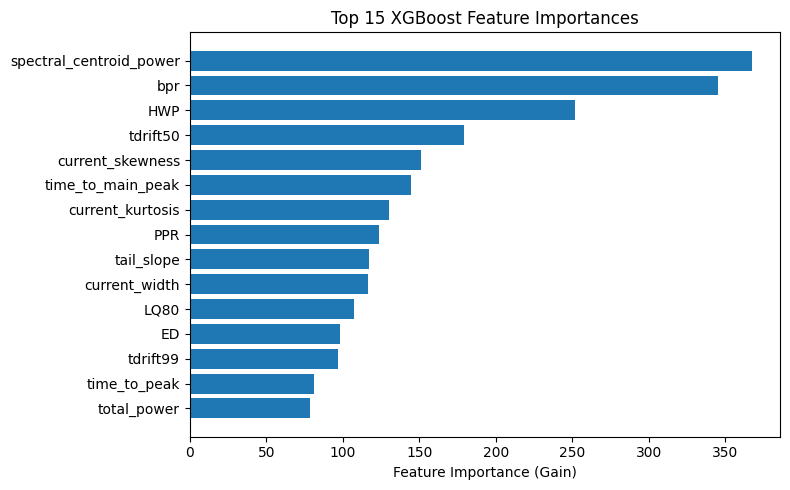

In [ ]:
top_n = 15
top_xgb_imp = xgb_imp_df.head(top_n).sort_values("importance", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(top_xgb_imp["feature"], top_xgb_imp["importance"])
plt.xlabel("Feature Importance (Gain)")
plt.title(f"Top {top_n} XGBoost Feature Importances")
plt.tight_layout()
plt.show()
